# ⚠️ The basics

Here we'll discuss how to instantiate spherical harmonic maps, manipulate them, plot them, and compute simple phase curves and occultation light curves.

In [1]:
%matplotlib inline

In [2]:
import starry
import matplotlib.pyplot as plt
import numpy as np

starry.config.lazy = False

## Introduction

Surface maps in ``starry`` are described by a vector of spherical harmonic coefficients. Just like polynomials on the real number line, spherical harmonics form a complete basis on the surface of the sphere. **Any** surface map can be expressed as a linear combination of spherical harmonics, provided one goes to sufficiently high degree in the expansion.

In ``starry``, the surface map is described by the vector **y**, which is indexed by increasing degree $l$ and order $m$:

$y = \{Y_{0,0}, \, Y_{1,-1}, \, Y_{1,0}, \, Y_{1,1} \, Y_{2,-2}, \, Y_{2,-1}, \, Y_{2,0} \, Y_{2,1}, \, Y_{2,2}, \, ...\}$.

For reference, here's what the first several spherical harmonic degrees look like:

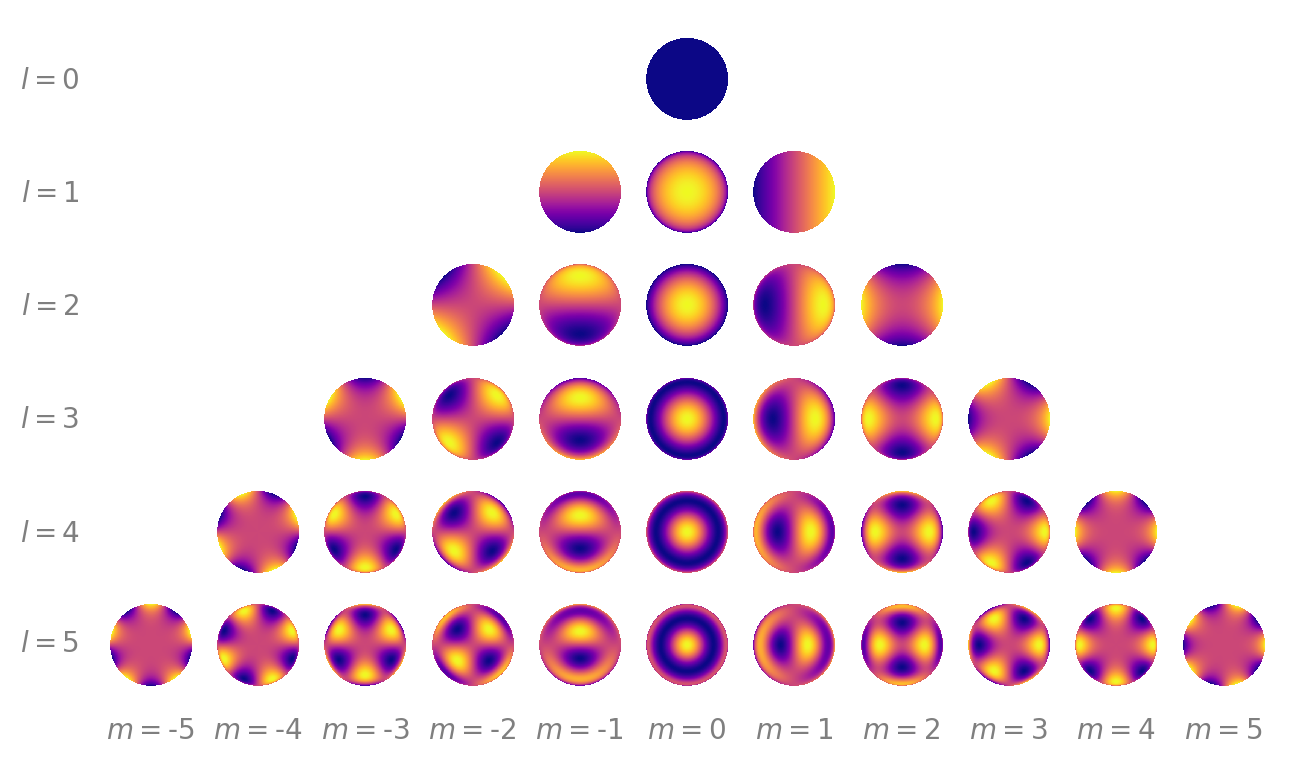

In [3]:
ydeg = 5
fig, ax = plt.subplots(ydeg + 1, 2 * ydeg + 1, figsize=(7.5, 4.5))
fig.subplots_adjust(hspace=0)
fig.patch.set_facecolor("w")
for axis in ax.flatten():
    axis.set_xticks([])
    axis.set_yticks([])
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
for l in range(ydeg + 1):
    ax[l, 0].set_ylabel(r"$l = %d$" % l,
                        rotation='horizontal',
                        labelpad=20, y=0.38,
                        fontsize=10, alpha=0.5)
for j, m in enumerate(range(-ydeg, ydeg + 1)):
    if m < 0:
        ax[-1, j].set_xlabel(r"$m {=} \mathrm{-}%d$" % -m,
                             labelpad=10, fontsize=10, alpha=0.5)
    else:
        ax[-1, j].set_xlabel(r"$m = %d$" % m, labelpad=10, fontsize=10, alpha=0.5)

# Loop over the orders and degrees
map = starry.Map(ydeg=ydeg, quiet=True)
for i, l in enumerate(range(ydeg + 1)):
    for j, m in enumerate(range(-l, l + 1)):

        # Offset the index for centered plotting
        j += ydeg - l

        # Compute the spherical harmonic
        # with no rotation
        map.reset()
        if l > 0:
            map[l, m] = 1

        # Plot the spherical harmonic
        ax[i, j].imshow(map.render(), cmap='plasma',
                        interpolation="none", origin="lower",
                        extent=(-1, 1, -1, 1))
        ax[i, j].set_xlim(-1.1, 1.1)
        ax[i, j].set_ylim(-1.1, 1.1)

Each row corresponds to a different degree $l$, starting at $l = 0$. Within each row, the harmonics extend from order $m = -l$ to order $m = l$.

As an example, suppose we have the following map vector:

```
y = [1.00,  0.22,  0.19,  0.11,  0.11,  0.07,  -0.11, 0.00,  -0.05,
     0.12,  0.16,  -0.05, 0.06,  0.12,  0.05,  -0.10, 0.04,  -0.02,
     0.01,  0.10,  0.08,  0.15,  0.13,  -0.11, -0.07, -0.14, 0.06,
     -0.19, -0.02, 0.07,  -0.02, 0.07,  -0.01, -0.07, 0.04,  0.00]
```

This is how much each spherical harmonic is contributing to the sum:

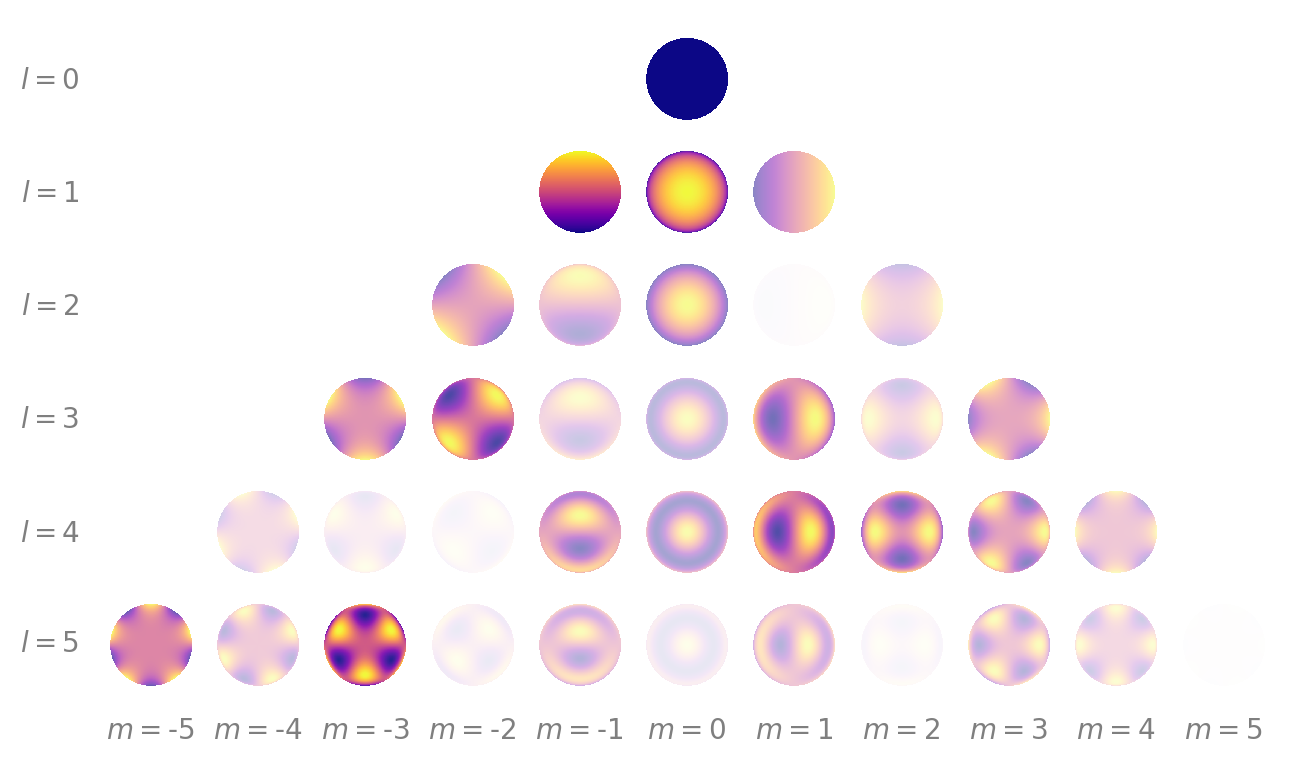

In [4]:
ydeg = 5
fig, ax = plt.subplots(ydeg + 1, 2 * ydeg + 1, figsize=(7.5, 4.5))
fig.subplots_adjust(hspace=0)
fig.patch.set_facecolor("w")
for axis in ax.flatten():
    axis.set_xticks([])
    axis.set_yticks([])
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
for l in range(ydeg + 1):
    ax[l, 0].set_ylabel(r"$l = %d$" % l,
                        rotation='horizontal',
                        labelpad=20, y=0.38,
                        fontsize=10, alpha=0.5)
for j, m in enumerate(range(-ydeg, ydeg + 1)):
    if m < 0:
        ax[-1, j].set_xlabel(r"$m {=} \mathrm{-}%d$" % -m,
                             labelpad=10, fontsize=10, alpha=0.5)
    else:
        ax[-1, j].set_xlabel(r"$m = %d$" % m, labelpad=10, fontsize=10, alpha=0.5)

# Loop over the orders and degrees
map = starry.Map(ydeg=ydeg, quiet=True)
map.load('earth')
y = np.abs(np.array(map.y))
y[1:] /= np.max(y[1:])
n = 0
for i, l in enumerate(range(ydeg + 1)):
    for j, m in enumerate(range(-l, l + 1)):

        # Offset the index for centered plotting
        j += ydeg - l

        # Compute the spherical harmonic
        # with no rotation
        map.reset()
        if l > 0:
            map[l, m] = 1

        # Plot the spherical harmonic
        ax[i, j].imshow(map.render(), cmap='plasma',
                        interpolation="none", origin="lower",
                        extent=(-1, 1, -1, 1), alpha=y[n])
        ax[i, j].set_xlim(-1.1, 1.1)
        ax[i, j].set_ylim(-1.1, 1.1)
        n += 1

If we add up all of the terms, we get the following image:

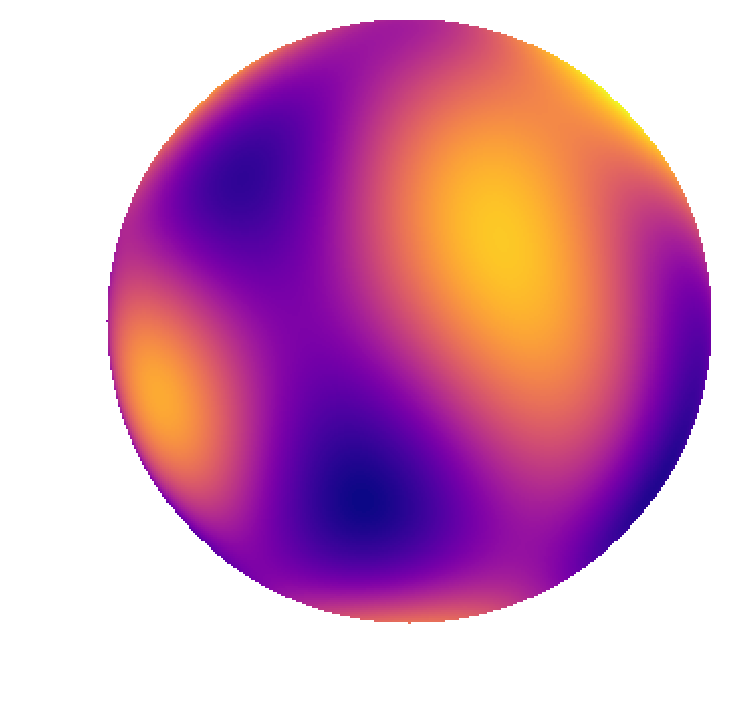

In [5]:
map = starry.Map(ydeg=ydeg, quiet=True)
map.load('earth')
fig, ax = plt.subplots(1)
ax.imshow(map.render(), origin="lower", cmap="plasma")
ax.axis("off");

which is the $l = 5$ spherical harmonic expansion of a map of the Earth! South America is to the left and Africa is toward the top right. It might still be hard to see, so here's what we would get if we carried the expansion up to degree $l = 20$:

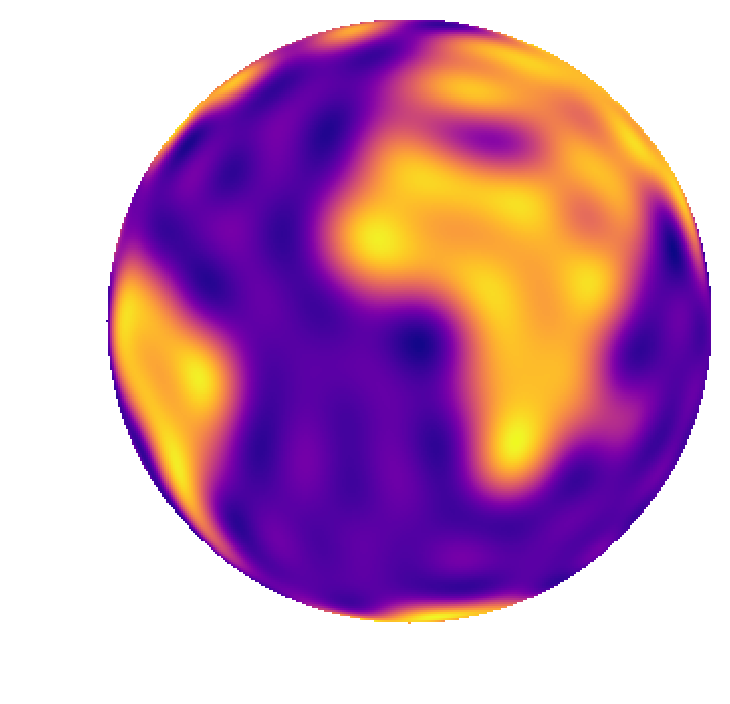

In [6]:
map = starry.Map(ydeg=20, quiet=True)
map.load('earth')
fig, ax = plt.subplots(1)
ax.imshow(map.render(), origin="lower", cmap="plasma")
ax.axis("off");

## Using `starry`
OK, now that we've introduced the spherical harmonics, let's look at how we can use `starry` to model some celestial bodies.

The first thing we should do is import `starry` and instantiate a `Map` object. This is the simplest way of creating a spherical harmonic map. The `Map` object takes a few arguments, the most important of which is `ydeg`, the highest degree of the spherical harmonics used to describe the map. Let's create a fifth-degree map:

In [7]:
import starry
starry.config.lazy = False

map = starry.Map(ydeg=5, quiet=True)

(We will discuss the ``lazy`` setting in just a moment; let's ignore that for now.) The ``y`` attribute of the map stores the spherical harmonic coefficients. We can see that our map is initialized to a constant map:

In [8]:
map.y

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

The $Y_{0,0}$ coefficient is always fixed at unity, and by default all other coefficients are set to zero. Our map is therefore just the first spherical harmonic, which if you scroll up you'll see is that constant dark blue disk at the top of the first figure. We can also quickly visualize the map by calling the `show` method:

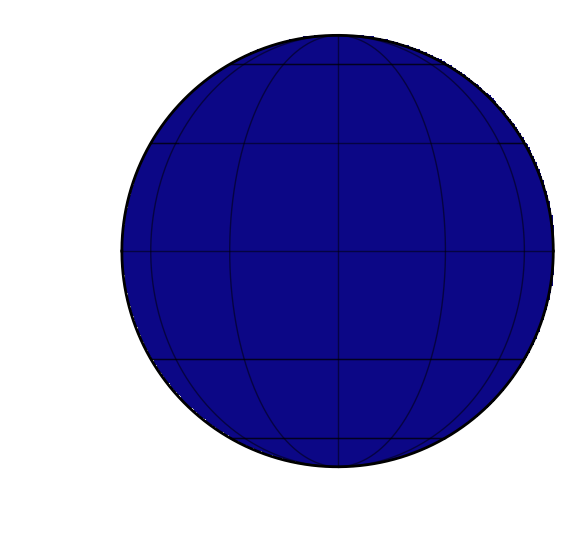

In [9]:
map.show()

Not that interesting! But before we give this map some features, let's briefly discuss how we would *evaluate* our map. This means computing the intensity at a latitude/longitude point on the surface. Let's investigate the intensity at the center (``lat = lon = 0``) of the map:

In [10]:
map.intensity(lat=0, lon=0)

array([0.31830989])

Since our map is constant, this is the intensity everywhere on the surface. It may seem like a strange number, but perhaps it will make sense if compute what the total *flux* (intensity integrated over area) of the map is. Since the map is constant, and since the body we're modeling has unit radius by default, the total flux visible to the observer is just...

In [11]:
import numpy as np
np.pi * 1.0 ** 2 * map.intensity(lat=0, lon=0)

array([1.])

So the total flux visible from the map is [unity](https://en.wikipedia.org/wiki/0.999...). **This is how maps in** `starry` **are normalized:** the average disk-integrated intensity is equal to the coefficient of the constant $Y_{0,0}$ harmonic, which is fixed at unity. We're going to discuss in detail how to compute fluxes below, but here's a sneak peek:

In [12]:
map.flux()

array([1.])

Given zero arguments, the `flux` method of the map returns the total visible flux from the map, which as we showed above, is just unity.

## Setting map coefficients

Okay, onto more interesting things. Setting spherical harmonic coefficients is extremely easy: we can assign values directly to the map instance itself. Say we wish to set the coefficient of the spherical harmonic $Y_{5, -3}$ to $-2$. We simply run

In [13]:
map[5, -3] = -2

We can check that the spherical harmonic vector (which is a flattened version of the image we showed above) has been updated accordingly:

In [14]:
map.y

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

And here's what our map now looks like:

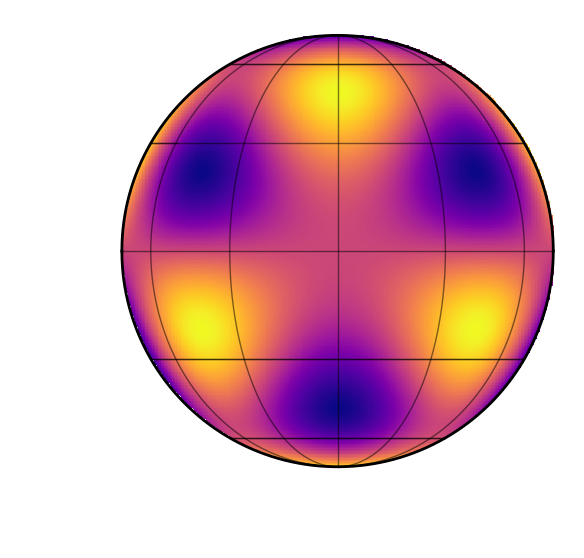

In [15]:
map.show()

Just for fun, let's set two additional coefficients:

In [16]:
map[5, 0] = 2
map[5, 4] = 1

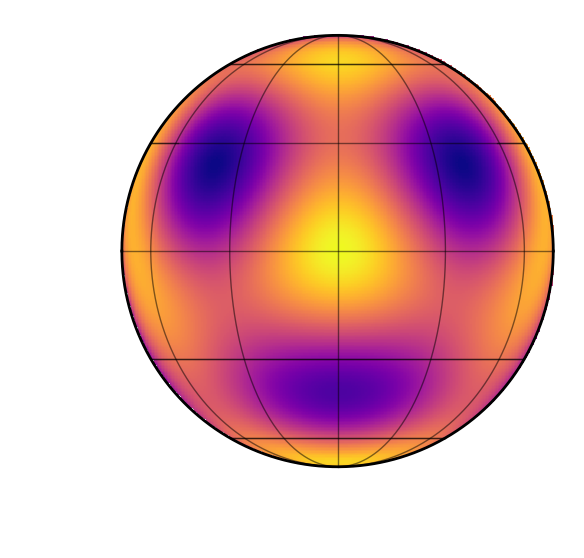

In [17]:
map.show()

Kind of looks like a smiley face!

**Pro tip:** *To turn your smiley face into a Teenage Mutant Ninja Turtle, simply edit the* $Y_{5,2}$ *coefficient:*

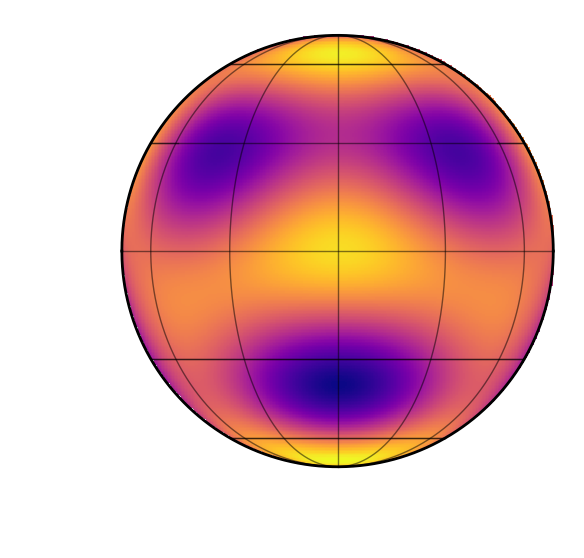

In [18]:
map[5, 2] = 1.5
map.show()

It's probably useful to play around with setting coefficients and plotting the resulting map to get a feel for how the spherical harmonics work. 

Two quick notes on visualizing maps: first, you can animate them by passing a vector ``theta`` argument to ``show()``; this is just the rotational phase at which the map is viewed. By default, angles in ``starry`` are in degrees (this can be changed by setting ``map.angle_unit``).

In [19]:
theta = np.linspace(0, 360, 50)
map.show(theta=theta)

Second, we can easily get an equirectangular (latitude-longitude) global view of the map as follows:

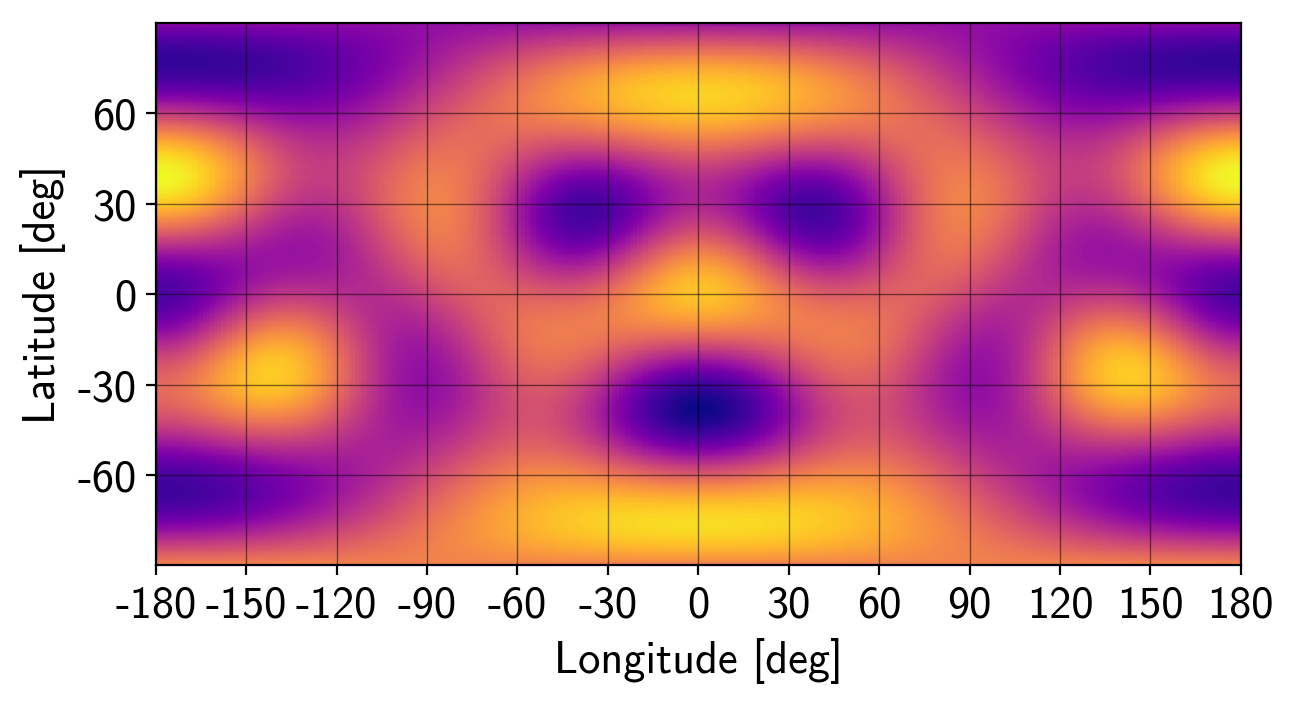

In [20]:
map.show(projection="rect")

## Loading map images

In addition to directly specifying the spherical harmonic coefficients of a map, users can "load" images into ``starry`` via the ``load()`` method, which computes the spherical harmonic expansion of whatever image/array is provided to it. Users can pass paths to image files, numpy arrays on a rectangular latitude/longitude grid, or Healpix maps. ``starry`` comes with a few built-in maps to play around with:

In [21]:
import os
import glob
for file in glob.glob(os.path.join(os.path.dirname(starry.__file__), "img", "*.jpg")):
    print(os.path.basename(file)[:-4])

spot
jupiter
earth
moon


Let's load the ``earth`` map and see what we get:

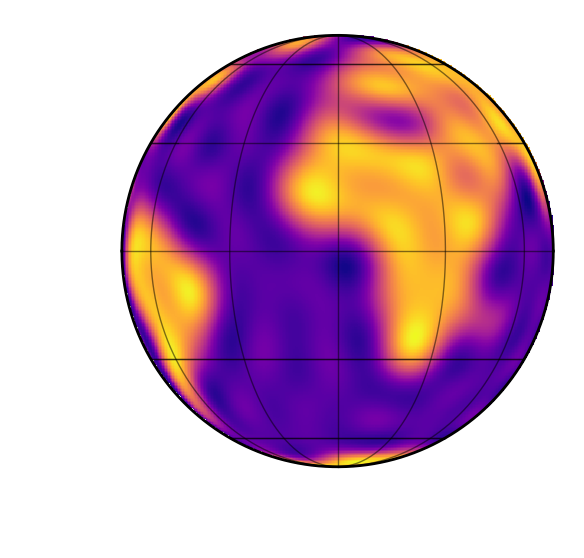

In [22]:
map = starry.Map(ydeg=20, quiet=True)
map.load("earth")
map.show()

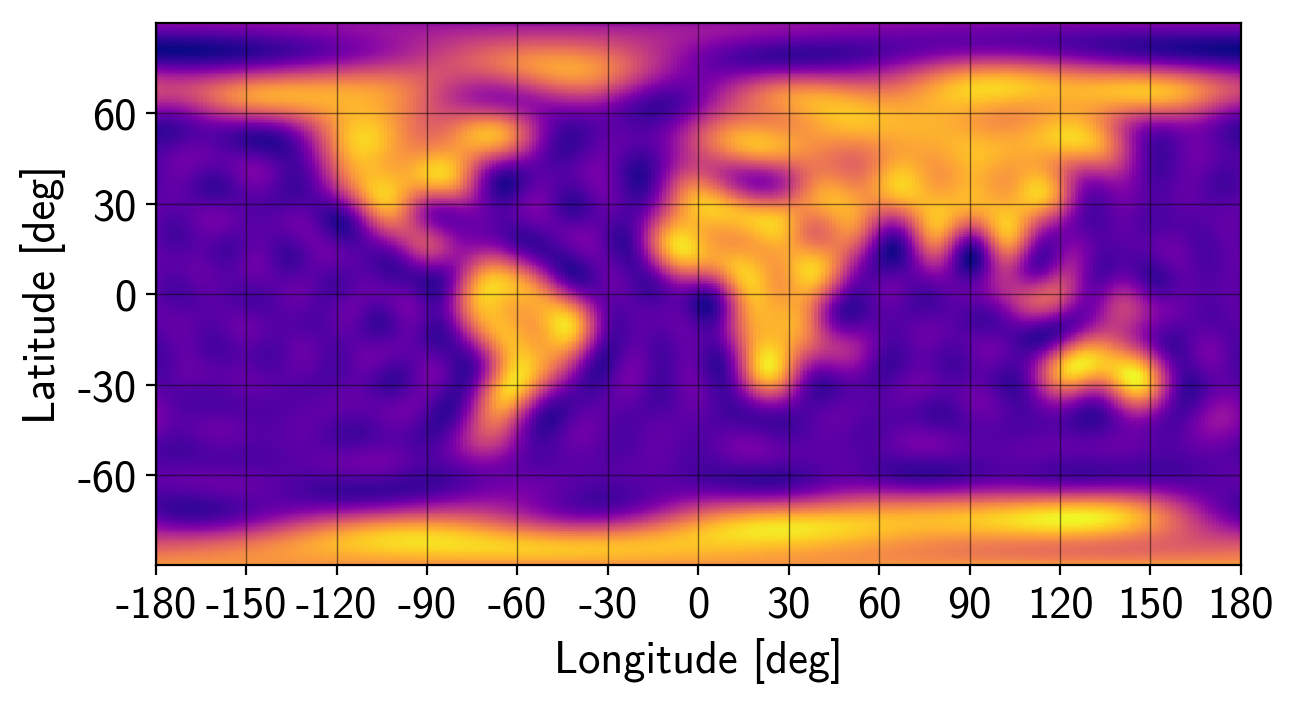

In [23]:
map.show(projection='rect')

## Changing the orientation

We can change the orientation of the map by specifying its inclination `inc` and obliquity `obl`. Note that these are properties of the *observer*. Changing these values changes the vantage point from which we see the map; it does not change the internal spherical harmonic representation of the map. Rather, map coefficients are defined in a static, invariant frame and the map can be observed from different vantage points by changing these angles. (This is different from the convention in version `0.3.0` of the code; see the tutorial on **Map Orientation** for more information).

The obliquity is measured as the rotation angle of the objecet on the sky plane, measured counter-clockwise from north. The inclination is measured as the rotation of the object away from the line of sight. Let's set the inclination and obliquity of the Earth as an example:

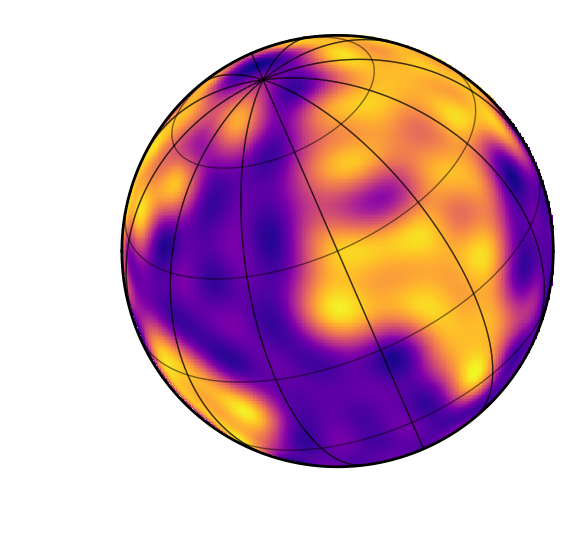

In [24]:
map.obl = 23.5
map.inc = 60.0
map.show()

## Computing the intensity

We already hinted at how to compute the intensity at a point on the surface of the map: just use the ``intensity()`` method. This method takes the latitude and longitude of a point or a set of points on the surface and returns the specific intensity at each one.

As an example, let's plot the intensity of the Earth along the equator:

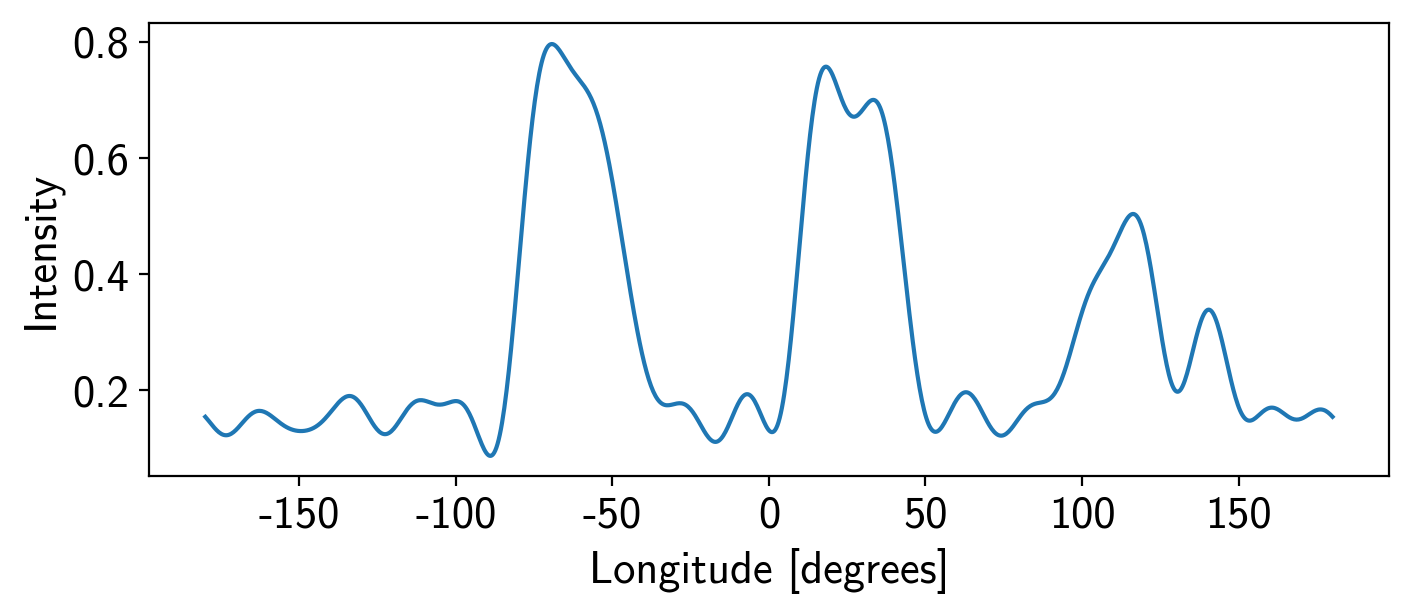

In [25]:
lon = np.linspace(-180, 180, 1000)
I = map.intensity(lat=0, lon=lon)
fig = plt.figure(figsize=(8, 3))
plt.plot(lon, I)
plt.xlabel("Longitude [degrees]")
plt.ylabel("Intensity");

We can easily identify the Pacific (dark), South American (bright), the Atlantic (dark), Africa (bright), the Indian Ocean (dark), and Australia (bright).

## Computing the flux

### Phase curves

The ``starry`` code is all about modeling light curves, so let's generate some. We'll talk about phase curves first, in which the observed flux is simply the integral over the entire disk when the object is viewed at a particular phase. Flux computations are done via the ``flux()`` method, and the phase is specified via the ``theta`` keyword:

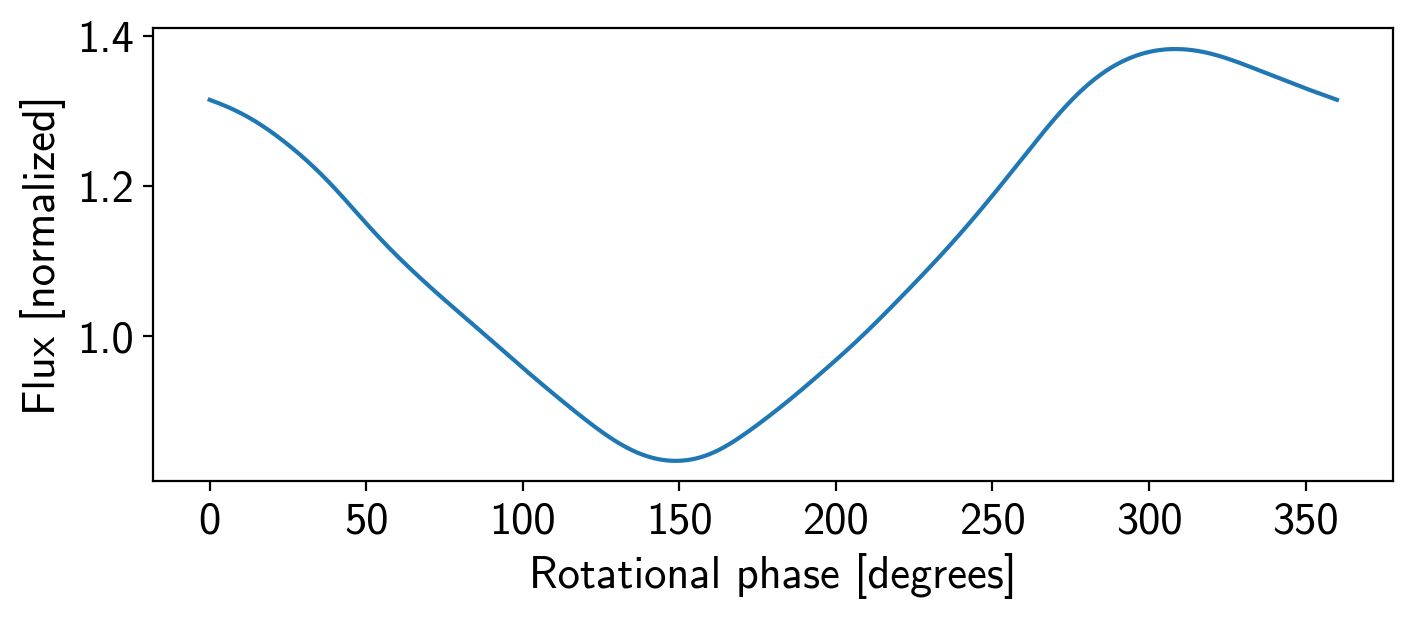

In [26]:
theta = np.linspace(0, 360, 1000)
plt.figure(figsize=(8, 3))
plt.plot(theta, map.flux(theta=theta));
plt.xlabel("Rotational phase [degrees]")
plt.ylabel("Flux [normalized]");

Note that this phase curve corresponds to rotation about the axis of the map, which is inclined and rotated as we specified above. We are therefore computing the disk-integrated intensity at each frame of the following animation:

In [27]:
map.show(theta=np.linspace(0, 360, 50))

Changing the orientation of the map will change the phase curve we compute. Here's the phase curve of the Earth at different values of the inclination:

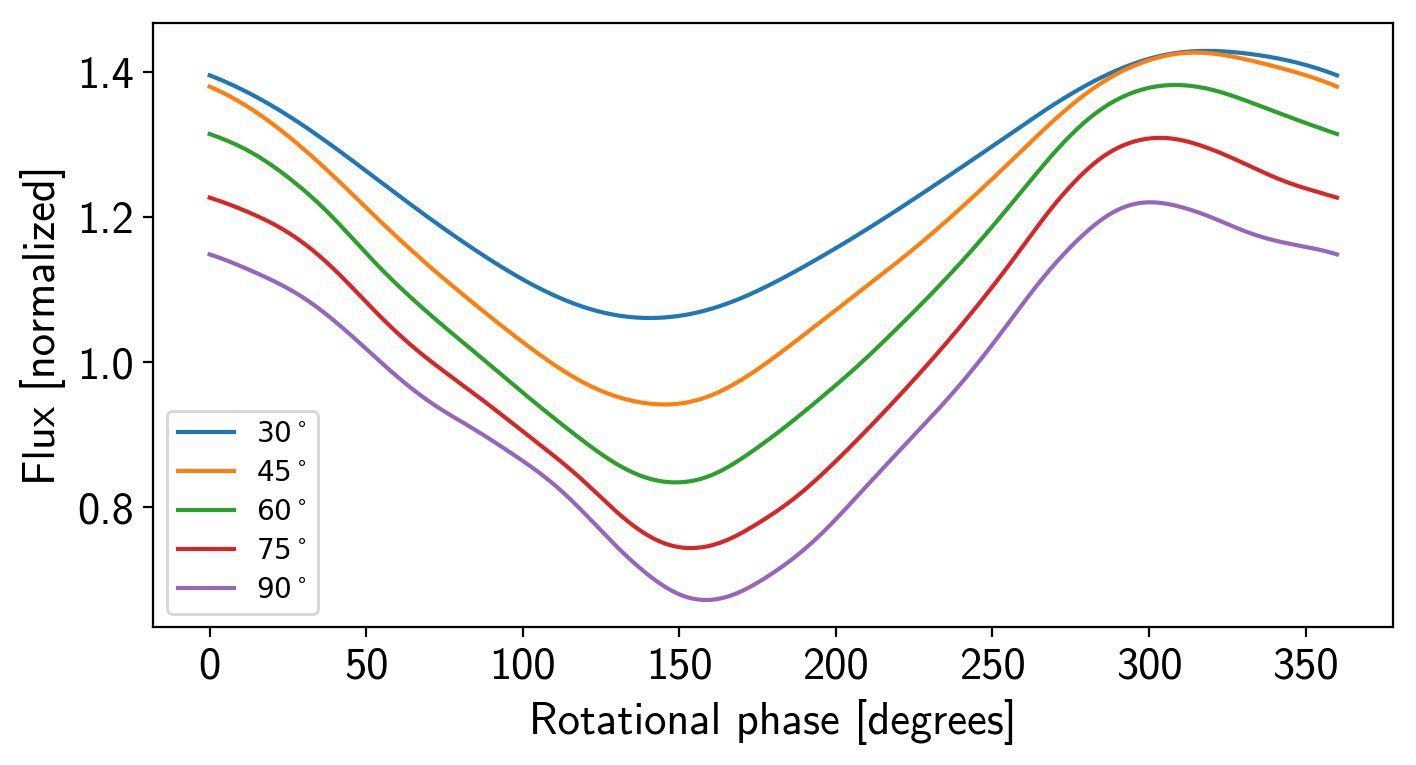

In [28]:
plt.figure(figsize=(8, 4))
for inc in [30, 45, 60, 75, 90]:
    map.inc = inc
    plt.plot(theta, map.flux(theta=theta), label=r"$%2d^\circ$" % inc);
plt.legend(fontsize=10)
plt.xlabel("Rotational phase [degrees]")
plt.ylabel("Flux [normalized]");

Trivially, changing the obliquity does not affect the phase curve:

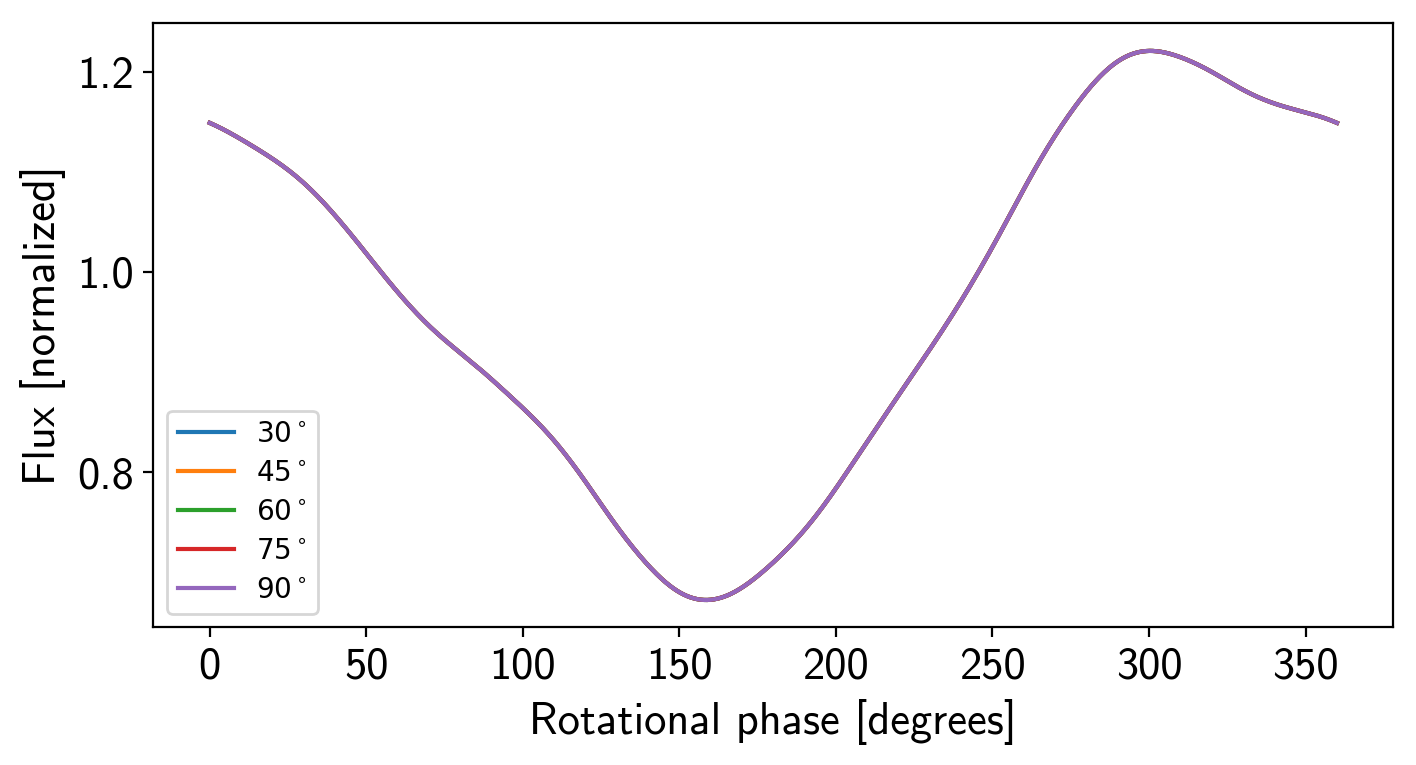

In [32]:
plt.figure(figsize=(8, 4))
for obl in [30, 45, 60, 75, 90]:
    map.obl = obl
    plt.plot(theta, map.flux(theta=theta), label=r"$%2d^\circ$" % obl);
plt.legend(fontsize=10)
plt.xlabel("Rotational phase [degrees]")
plt.ylabel("Flux [normalized]");

## Occultations